# Librerías

In [1]:
## Funciones algebráicas
import numpy as np
## Tratamiento de datos
import pandas as pd
## Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Eliminación de los avisos
import warnings
warnings.filterwarnings('ignore')

# Carga del set de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/Proyectos_Carlos/Crop_production'
!ls

/content/drive/My Drive/Colab Notebooks/Proyectos_Carlos/Crop_production
crop_production.ipynb  Production_Crops.csv


In [4]:
df=pd.read_csv('Production_Crops.csv', encoding='ISO-8859-1')

df.head()


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


## Información sobre el set de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513868 entries, 0 to 2513867
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 211.0+ MB


**El set de datos consta de más 2.500.000 de observaciones y 11 variables**

## Presencia de valores nulos

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           154312
Flag            530383
dtype: int64


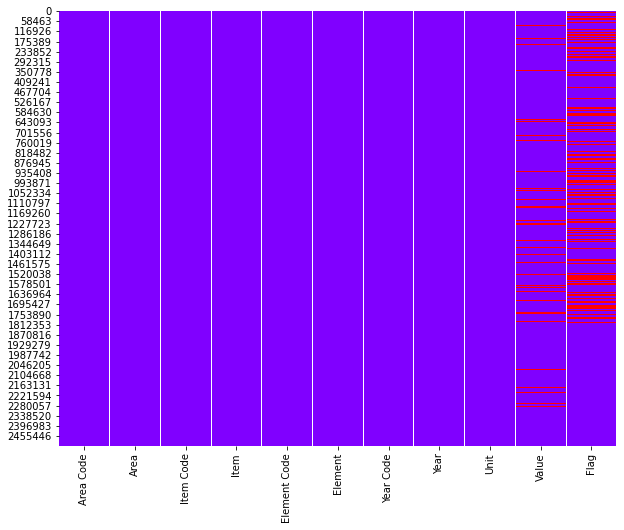

In [6]:
print(df.isnull().sum())

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='rainbow')
plt.show()

### Observación de la procedencia de los valores nulos


In [7]:
print(df[df['Value'].isnull()]['Year'].unique())

[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 2014 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2015 2016
 2017 2018 2019]


**Los valores nulos se encuentran distribuidos de forma aleatoria y su presencia no está relacionada con el hecho de que pudieran corresponder a registros antiguos.**

#### Significado de los códigos representados en la variable Flag

In [8]:
print(df['Flag'].unique())

['F' 'Im' nan '*' 'Fc' 'M' 'A']


Significado de cada una de las etiquetas

* F:FAO estimate
* Im: FAO data based on imputation methodology
* blank (nan): Official data
* *: Unofficial figure
* Fc: Calculated data
* M: Data not available
* A: Aggregate; may include official; semi-official; estimated or calculated data

Como se puede ver, la variable Flag representa mediante clases las distintas
formas en las que se han recopilado estos datos.

## Eliminación de valores nulos y de la variable Flag


In [9]:
print(round(df.isnull().sum()/len(df)*100, 2))

Area Code        0.00
Area             0.00
Item Code        0.00
Item             0.00
Element Code     0.00
Element          0.00
Year Code        0.00
Year             0.00
Unit             0.00
Value            6.14
Flag            21.10
dtype: float64


**La cantidad de valores nulos presentes en la variable 'Value' representan solo
el 6.14% del total de las observaciones. Por ello, se decide eliminar esos registros, ya que probablemente no se producirá la pérdida de mucha información.**

**Por otro lado, tal y como se ha visto anteriormente, la variable Flag indica de que manera se han recopilado esos datos. Esta información no es relevante para el propósito que se persigue, por lo que se produce a su eliminación.**

### Creación de un nuevo set de datos sin valores nulos y sin la variable 'Flag'


In [10]:
data=df.dropna(axis=0, how='any')
data=data.loc[:, data.columns!='Flag']
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0


In [11]:
# Comprobación de la ausencia de valores nulos
data.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

**Se puede observar que ya no existen valores nulos**

## Eliminación de los registros que representen valores globales

**Se refiere a registros que comprenden a un agrupación de cultivos o países (continentes o parte de ellos)**

In [12]:
# Continentes
data['Area'].unique()

cont_code=[5000, 5100, 5101, 5102, 5103, 5104, 5105, 5200, 5203,5204, 5206, 5207,
           5300, 5301, 5302, 5303, 5304, 5305, 5400, 5401, 5402, 5403, 5404, 5500,
           5501, 5502, 5503, 5504, 5706, 5707, 5801, 5802, 5803, 5815, 5817, 228,41]


In [13]:
# Eliminación de observaciones que correspondan a valores totales que representen continentes o partes de continentes

index_list=[]
for code in cont_code:
    index_list.extend(data[data['Area Code']==code].index)

index_list=np.array(index_list)

index_list.shape


data=data.drop(index=index_list)

data.shape

(1121176, 10)

In [14]:
# Comprobación de que ya no están los códigos
code=data['Area Code'].unique()
cont_code in code

False

**Se puede verificar que se han eliminado del dataset todos los registros de códigos correspondientes a continentes o parte de ellos y también el que representa a la antigua Unión Soviética.**

In [15]:
# Similar operación para identificar aquellos códigos que corresponde a agrupaciones de cultivos

data['Item Code'].unique()

code_item=[1717, 1804, 1753, 1738, 1731, 1841, 1732, 1726, 1720, 1723, 1729, 1735]

df_item=data.groupby(by=['Item', 'Item Code'])[['Value']].sum().reset_index()
for code in code_item:
    print(df_item[df_item['Item Code']==code][['Item']])

index_item=[]
for code in code_item:
    index_item.extend(data[data['Item Code']==code].index)

index_item=np.array(index_item)

index_item.shape


data=data.drop(index=index_item)

data.shape

              Item
31  Cereals, Total
                   Item
40  Citrus Fruit, Total
                   Item
52  Fibre Crops Primary
             Item
57  Fruit Primary
         Item
101  Oilcrops
                          Item
102  Oilcrops, Cake Equivalent
                         Item
103  Oilcrops, Oil Equivalent
              Item
126  Pulses, Total
                        Item
136  Roots and Tubers, Total
                    Item
150  Sugar Crops Primary
                Item
162  Treenuts, Total
                   Item
166  Vegetables Primary


(795886, 10)

In [16]:
# Comprobación de que ya no están los códigos

code=data['Item Code'].unique()
code_item in code

False

**Se han eliminado del dataset los códigos correspondientes a continentes o parte de ellos y también el que representa a la antigua Unión Soviética.**

# Análisis exploratorio de los datos

In [17]:
# clases hay presentes en las variables cualitativas

for col in data.select_dtypes('object').columns:
    print(f'Número de clases en variable {col}:', data[col].nunique(),':', data[col].unique())

Número de clases en variable Area: 209 : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'China, Hong Kong SAR' 'China, Macao SAR'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Ethiopia PDR' 'Faroe Islands'
 'Fiji' 'Finland' 'France' 'Frenc

**Como se puede ver, se registran las producciones de una gran cantidad de productos. Otro aspecto a resaltar es que la producción se mide como área cultivada, rendimiento y producción.**
**Estas tres variables conviene que estén representadas de forma independiente, pues pueden aportar información de enorme interés.**

## Tabla pivotante

In [18]:
# Creación de un nuevo set de datos como tabla pivotante
p_data=pd.pivot_table(data, values='Value', columns=['Element'], index=['Area', 'Item', 'Year'])
# Rellenar los valores nulos por el valor de 0
p_data=p_data.fillna(0)
# Eliminación de la etiqueta Element
p_data.columns.name=None
# Reset index()
p_data=p_data.reset_index()
p_data.head()

,Area,Item,Year,Area harvested,Production,Yield
0,Afghanistan,"Almonds, with shell",1975,0.0,0.0,0.0
1,Afghanistan,"Almonds, with shell",1976,5900.0,9800.0,16610.0
2,Afghanistan,"Almonds, with shell",1977,6000.0,9000.0,15000.0
3,Afghanistan,"Almonds, with shell",1978,6000.0,12000.0,20000.0
4,Afghanistan,"Almonds, with shell",1979,6000.0,10500.0,17500.0


## Agrupación de cultivos

In [19]:
data_crops=p_data.groupby(by=['Item']).agg({'Area harvested':'mean',
                                          'Production':'mean',
                                          'Yield':'mean'}).reset_index()


data_crops.head()

,Item,Area harvested,Production,Yield
0,Agave fibres nes,4358.783908,3944.556322,9275.974713
1,"Almonds, with shell",10012.015672,4693.073306,17653.216886
2,"Anise, badian, fennel, coriander",6206.809122,4156.173986,10835.349099
3,Apples,28818.461158,223359.213041,136133.583569
4,Apricots,2084.713259,7660.072828,66119.047028


## Visualización de los 20 cultivos  más importantes en todo el mundo

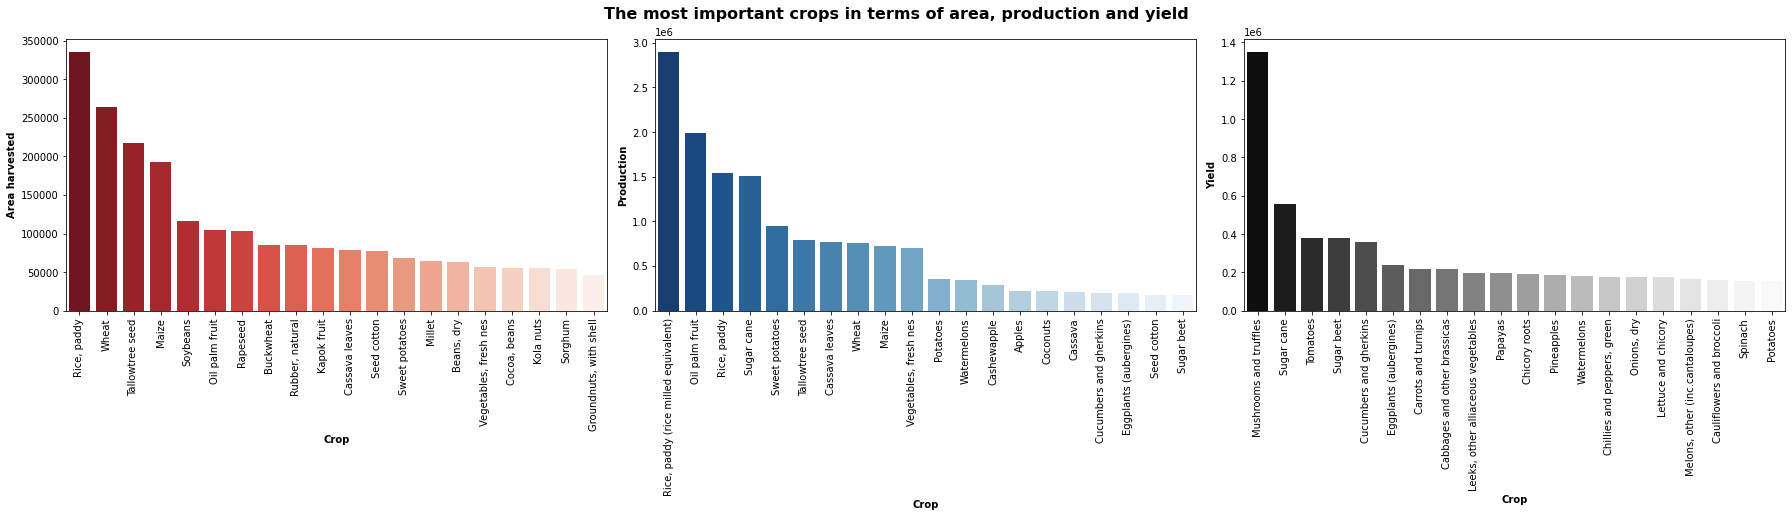

In [20]:
color=['Reds_r', 'Blues_r', 'Greys_r']


fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(25,7))

for i, col in enumerate(data_crops.select_dtypes('float64').columns):
    data_crops.sort_values(by=[col], ascending=False, inplace=True)
    plt.subplot(1,3,i+1)
    axi=sns.barplot(data=data_crops.head(20), x='Item', y=col, palette=color[i])
    plt.xlabel('Crop', weight='bold')
    plt.xticks(rotation=90)
    plt.ylabel(col, weight='bold')
plt.suptitle('The most important crops in terms of area, production and yield', fontsize=16, weight='bold', y=1.02)
plt.tight_layout(pad=1.1)
plt.show()

**Como se puede observar, existe un problema, pues están representados también los grupos de cultivos pertenecientes a los cereales, cultivos dedicados a la producción de aceite, las frutas en general, etc.**

### Eliminación de residuos que representen todavía algún tipo de agrupación de cultvios

**Creación de una función que permita separar las palabras. Una vez separadas, solo se guarda la primera palabra, pues es la que define el cultivo.**

In [21]:
p_data['Item'].unique()

p_data['Item'].replace(['Sugar crops nes', 'Sugar Crops Primary', 'Fibre Crops Primary'],
                       ['crops sugar nes', 'Crops Sugar Primary', 'Crops Fibre Primary'],
                       inplace=True)

In [22]:
def split_text(x):
    x=str(x.lower())
    x=x.replace(',','')
    return x.split()[0]

p_data['Item_keywords']=p_data['Item'].apply(split_text)

p_data


,Area,Item,Year,Area harvested,Production,Yield,Item_keywords
0,Afghanistan,"Almonds, with shell",1975,0.0,0.0,0.0,almonds
1,Afghanistan,"Almonds, with shell",1976,5900.0,9800.0,16610.0,almonds
2,Afghanistan,"Almonds, with shell",1977,6000.0,9000.0,15000.0,almonds
3,Afghanistan,"Almonds, with shell",1978,6000.0,12000.0,20000.0,almonds
4,Afghanistan,"Almonds, with shell",1979,6000.0,10500.0,17500.0,almonds
...,...,...,...,...,...,...,...
449746,Zimbabwe,Wheat,2015,0.0,0.0,20486.0,wheat
449747,Zimbabwe,Wheat,2016,0.0,0.0,19013.0,wheat
449748,Zimbabwe,Wheat,2017,0.0,0.0,17542.0,wheat
449749,Zimbabwe,Wheat,2018,27474.0,45000.0,16379.0,wheat


**A continuación, se seleccionan palabras clave que se refieren a conjunto de cultivos. Se lleva a cabo un loop for para crear una lista de clase de cultivos, diferenciándose entre aquellos que corresponde a grupo de cultivos y a cultivos.**


In [23]:
def classification(item):
    keywords=['fruit', 'crops', 'oilcrops', 'cereals', 'vegetables', 'citrus', 'roots']
    if item in keywords:
        return 'Crop group'
    else:
        return 'Crop'


p_data['Crop_class']=p_data['Item_keywords'].apply(lambda x: classification(x))

p_data

p_data['Crop_class'].unique()


data_crop=p_data[p_data['Crop_class']=='Crop'].groupby(by=['Item']).agg({'Area harvested':'mean',
                                                                        'Production':'mean',
                                                                        'Yield':'mean'}).reset_index()


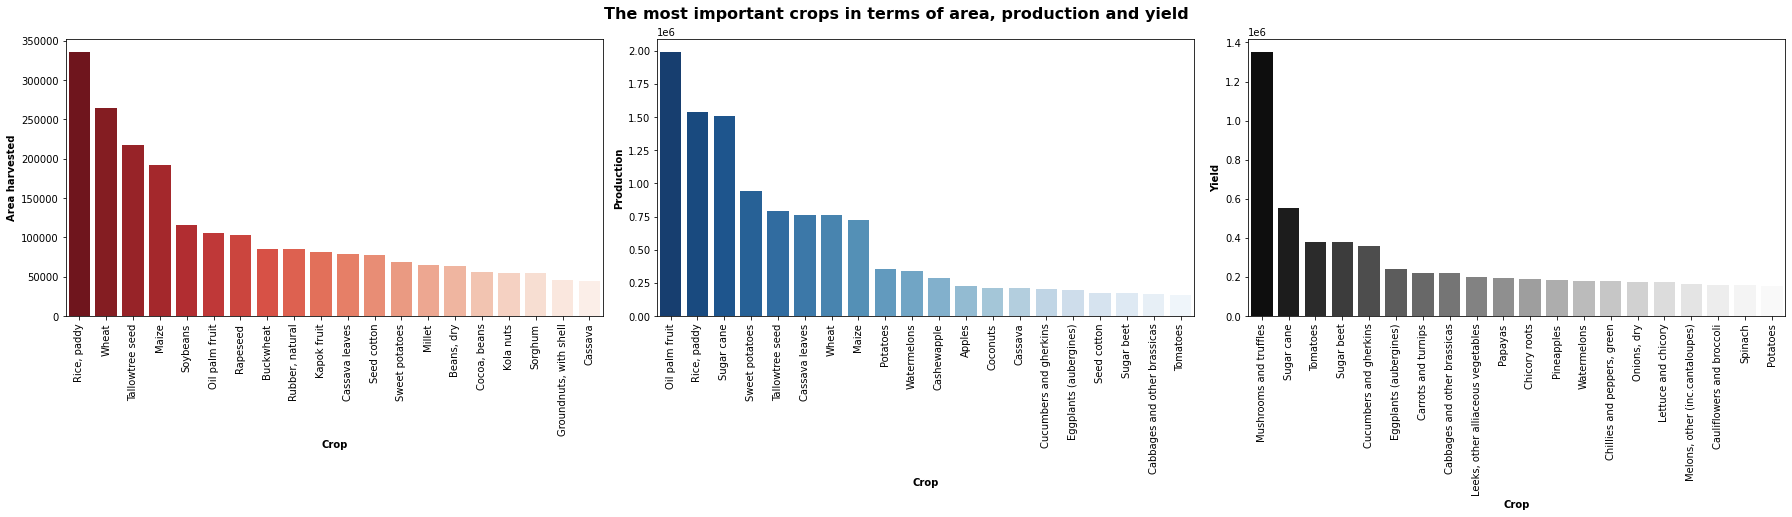

In [24]:
color=['Reds_r', 'Blues_r', 'Greys_r']


fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(25,7))

for i, col in enumerate(data_crop.select_dtypes('float64').columns):
    data_crop=data_crop[data_crop['Item']!='Rice, paddy (rice milled equivalent)']
    data_crop.sort_values(by=[col], ascending=False, inplace=True)
    plt.subplot(1,3,i+1)
    axi=sns.barplot(data=data_crop.head(20), x='Item', y=col, palette=color[i])
    plt.xlabel('Crop', weight='bold')
    plt.xticks(rotation=90)
    plt.ylabel(col, weight='bold')
plt.suptitle('The most important crops in terms of area, production and yield', fontsize=16, weight='bold', y=1.02)
plt.tight_layout(pad=1.1)
plt.show()


**Los cultivos con mayor extensión cultivada durante los últimos 60 años se corresponden con los cereales, destacando como es lógico el arroz y el trigo. En cuanto a producción, destaca el aceite de palma, sobre el cual existe una enorme controversia social por su efecto negativo sobre la salud. Por último, en cuanta rendimiento, resulta muy interesante destacar el cultivo de champiñones y trufas, siendo éste muy significativamente superior
al resto.**

## Evolución temporal de la producción de los principales cereales a los largo de los años.

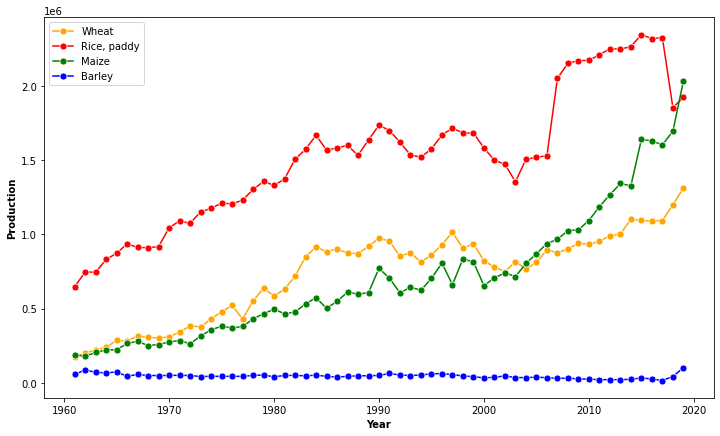

In [25]:
data_cereal=p_data.groupby(by=['Item', 'Year'])[['Production']].mean().reset_index()

line_color=['orange', 'red', 'green', 'blue']
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(12,7))
for i, cereal in enumerate(['Wheat', 'Rice, paddy', 'Maize', 'Barley']):
    data_cereal_=data_cereal[data_cereal['Item']==cereal]
    ax=sns.lineplot(data=data_cereal_, color=line_color[i], x='Year', y='Production', marker='o', markersize=7)
    plt.xlabel('Year', weight='bold')
    plt.ylabel('Production', weight='bold')
plt.legend(['Wheat', 'Rice, paddy', 'Maize', 'Barley'])
plt.show()

**Como se puede observar, el trigo, el arroz y el máiz han sufrido un incremento de producción considerable desde que se comenzó a recopilar datos. Destacar en el caso del máiz un pico significativo que se produjo a principios de este siglo.
No obstante, este crecimiento no se ha producido en el caso de la cebada, donde se podría decir que la producción se ha mantenido más o menos estable durante todos estos años.**

## Evolución temporal de la producción de aceite de palma

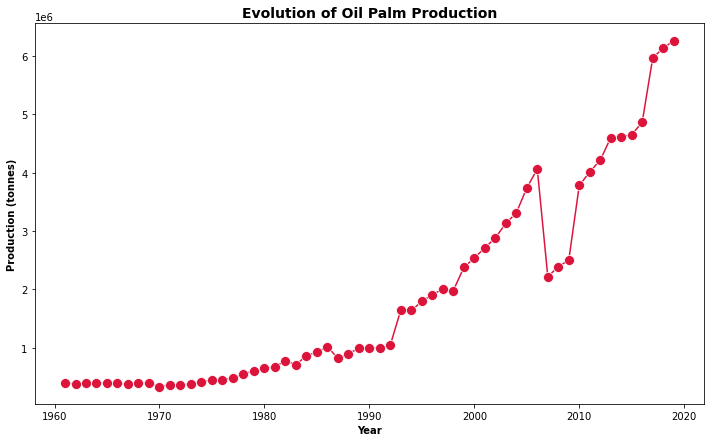

In [26]:
data_palm=p_data.groupby(by=['Item', 'Year'])[['Production']].mean().reset_index()

data_palm_=data_palm[data_palm['Item']=='Oil palm fruit']

plt.figure(figsize=(12,7))
sns.lineplot(data=data_palm_, x='Year', y='Production', color='crimson', marker='o', markersize=10)
plt.xlabel('Year', weight='bold')
plt.ylabel('Production (tonnes)', weight='bold')
plt.title('Evolution of Oil Palm Production', weight='bold', fontsize=14)
plt.show()

**El cultivo de los frutos que producen el aceite de palma se ha incrementado
a lo largo de años, pese a que está claramente demostrado su efecto negativo
en la salud.**

## Los diez principales productores de trigo, arroz, máiz y cebada.

Text(0.5, 1.02, 'Top 10 countries in terms of production of Wheat, Rice, Maize and Barley')

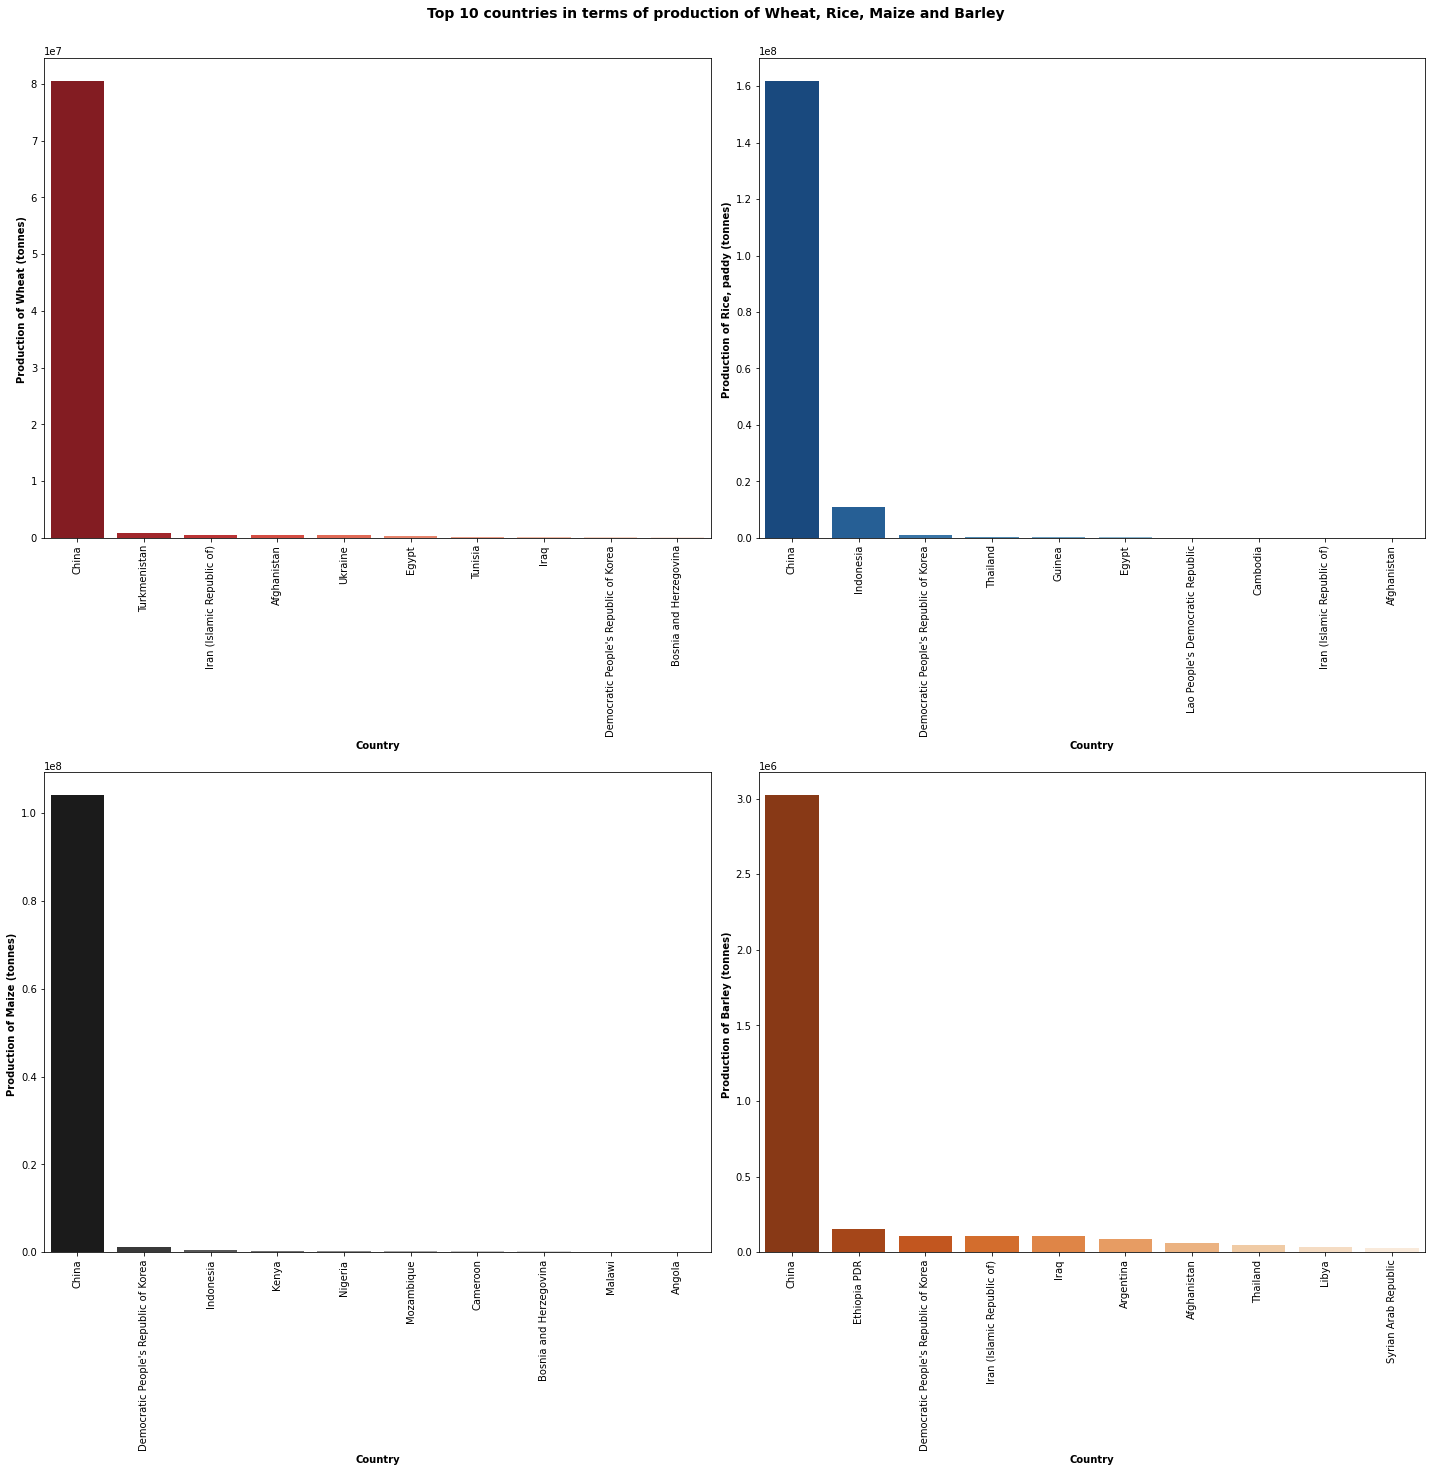

In [27]:
country_cereal=p_data.groupby(by=['Area', 'Item'])[['Production']].mean().reset_index()

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
palette_color=['Reds_r', 'Blues_r', 'Greys_r', 'Oranges_r']
for i, col in enumerate(['Wheat', 'Rice, paddy', 'Maize', 'Barley']):
    country_cereal_=country_cereal[country_cereal['Item']==col][['Area', 'Production']] \
              .sort_values(by=['Production'], ascending=False).head(10)
    plt.subplot(2,2,i+1)
    axi=sns.barplot(data=country_cereal_, x='Area', y='Production', palette=palette_color[i], alpha=1)
    plt.ylabel(f'Production of {col} (tonnes) ', weight='bold')
    plt.xlabel('Country', weight='bold')
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.1)
plt.suptitle('Top 10 countries in terms of production of Wheat, Rice, Maize and Barley', weight='bold', fontsize=14, y=1.02)



**Como se puede ver, China es, y de forma muy significativa, el mayor productor de los principales cultivos de cereales.**

## Mayores productores de aceite de palma

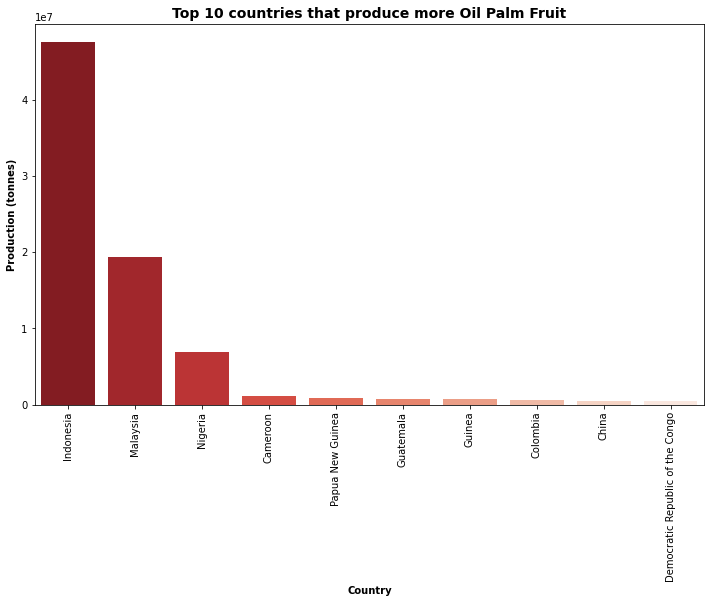

In [28]:
country_palm=p_data.groupby(by=['Area', 'Item'])[['Production']].mean().reset_index()

country_palm_=country_palm[country_palm['Item']=='Oil palm fruit'].sort_values(by=['Production'], ascending=False).head(10)

plt.figure(figsize=(12,7))
sns.barplot(data=country_palm_, x='Area', y='Production', palette='Reds_r')
plt.xlabel('Country', weight='bold')
plt.xticks(rotation=90)
plt.ylabel('Production (tonnes)', weight='bold')
plt.title('Top 10 countries that produce more Oil Palm Fruit', weight='bold', fontsize=14)
plt.show()

**El mayor productor de cultivos para la extracción de aceite de palma es Indonesia, seguido por Malasia y Nigeria.**

## Top 10 países en riqueza de diversidad de cultivos producidos

In [29]:
crop_data=p_data[p_data['Crop_class']=='Crop']
countries=crop_data.groupby(by=['Area', 'Item']).agg({'Year':'count'}).reset_index().rename(columns={'Year':'Years of Production'})
top_10=countries.groupby(by=['Area', 'Item']).agg({'Item':'count'}).rename(columns={'Item':'Count'}).reset_index()
top_10=top_10.groupby('Area').agg({'Count':'sum'}).reset_index().rename(columns={'Count':'Crops_cultivated'}) \
                                                  .sort_values(by='Crops_cultivated', ascending=False).head(10)
top_10.style.background_gradient(cmap='Reds')

,Area,Crops_cultivated
35,China,117
120,Mexico,106
175,Spain,99
191,Turkey,94
124,Morocco,90
199,United States of America,90
145,Peru,89
93,Italy,89
76,Greece,89
68,France,86


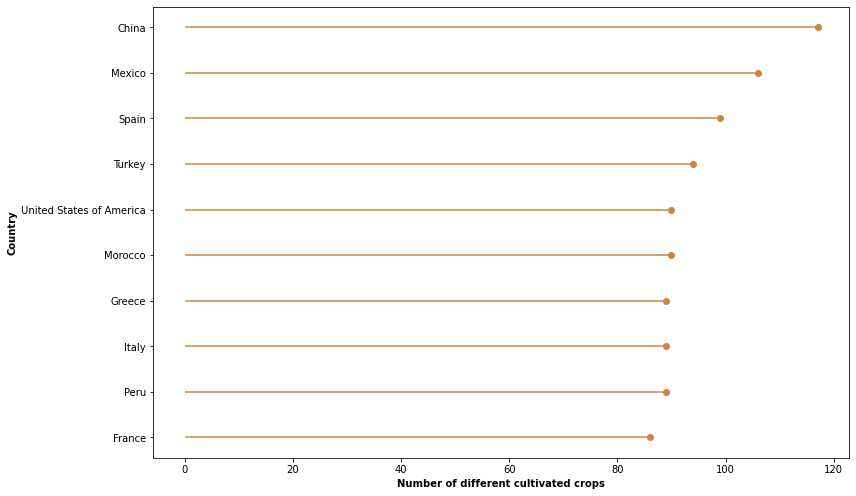

In [30]:
# Visualización
my_range=range(1,len(top_10.index)+1)
top_10=top_10.sort_values(by='Crops_cultivated', ascending=True)
plt.figure(figsize=(12,7))
plt.hlines(y=my_range, xmin=0, xmax=top_10['Crops_cultivated'], color='peru')
plt.plot(top_10['Crops_cultivated'], my_range, 'o', color='peru')
plt.yticks(my_range, top_10['Area'])
plt.xlabel('Number of different cultivated crops', weight='bold')
plt.ylabel('Country', weight='bold')
plt.tight_layout(pad=1.1)
plt.show()


**Se puede ver que el país con mayor diversidad de cultivos es China, seguido de Mexico y España.**

## 10 cultivos de mayor producción en el año 2015 en los tres países con mayor diversidad de cultivos.

In [31]:
# Creación de dataset de cada uno de los países
data_production=p_data[p_data['Crop_class']=='Crop']
data_production=data_production[data_production['Year']==2015]
data_production_china=data_production[data_production['Area']=='China'][['Area', 'Item', 'Production']].sort_values(by=['Production'], ascending=False).head(10)
data_production_mexico=data_production[data_production['Area']=='Mexico'][['Area', 'Item', 'Production']].sort_values(by=['Production'], ascending=False).head(10)
data_production_spain=data_production[data_production['Area']=='Spain'][['Area', 'Item', 'Production']].sort_values(by=['Production'], ascending=False).head(10)
# Concatenación de los tres datasets
data_production=pd.concat([data_production_china, data_production_mexico, data_production_spain], axis=0)
data_production.head()

,Area,Item,Production
78874,China,Maize,265157307.0
80693,China,"Rice, paddy",213723732.0
80752,China,"Rice, paddy (rice milled equivalent)",142553729.0
82468,China,Wheat,132646335.0
81584,China,Sugar cane,107728911.0


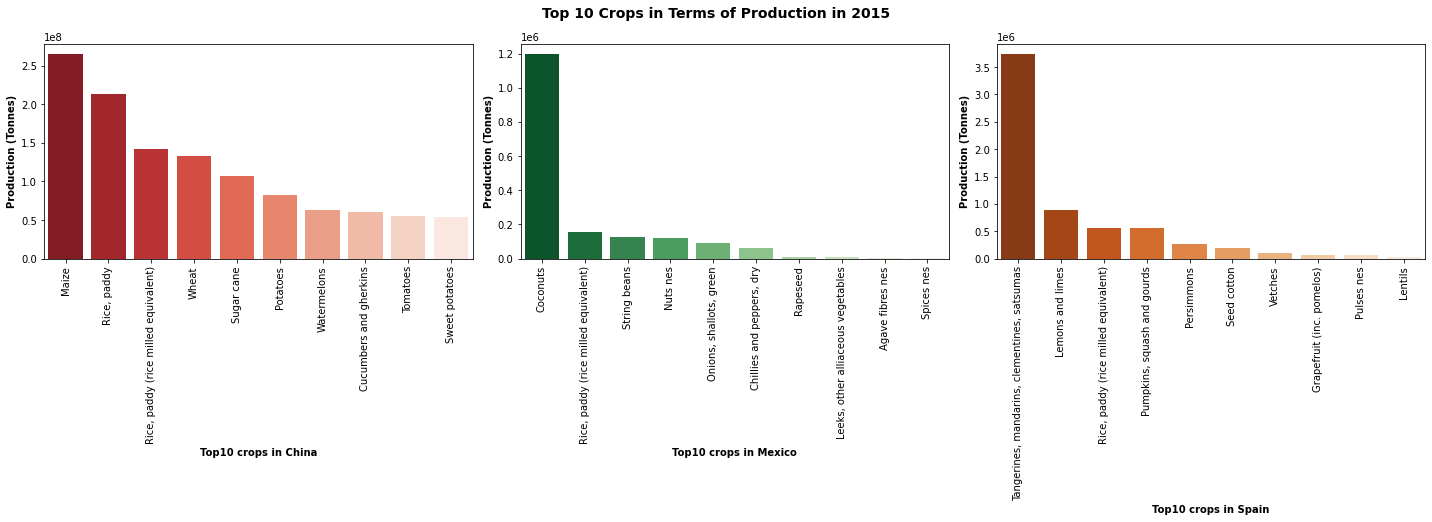

In [32]:
# Visualización

pal_color=['Reds_r', 'Greens_r', 'Oranges_r']
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(20,7))
for i, col in enumerate(data_production['Area'].unique()):
    df_prod=data_production[data_production['Area']==col]
    plt.subplot(1,3,i+1)
    sns.barplot(data=df_prod, x='Item', y='Production', palette=pal_color[i])
    plt.xlabel(f'Top10 crops in {col}', weight='bold')
    plt.xticks(rotation=90)
    plt.ylabel('Production (Tonnes)', weight='bold')
plt.tight_layout(pad=1.1)
plt.suptitle('Top 10 Crops in Terms of Production in 2015', weight='bold', fontsize=14, y=1.03)
plt.show()


**Resaltar que España se caracteriza por su producción en cítricos, China produce principalmente cereales y Mexico destaca significativamente por su producción en cocos.**

## Visualización de que proporción representan sobre el total cada uno 10 cultivos más producidos en España.

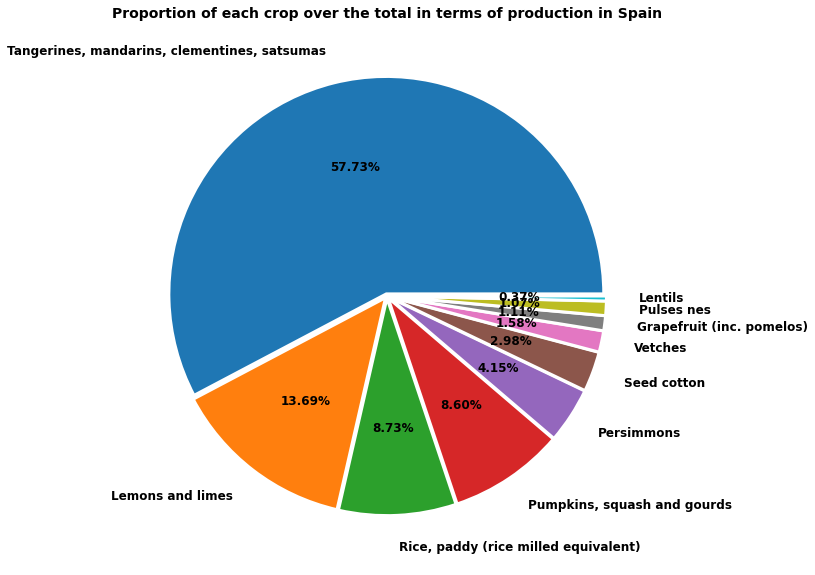

In [33]:
Spain=data_production[data_production['Area']=='Spain']

labels=list(Spain['Item'])
values=list(Spain['Production'])

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,
        labeldistance= 1.15,
        autopct='%.2f%%',
        explode=[0.01]*10,
        wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'},
        textprops={'fontsize': 12, 'weight':'bold'})
plt.title('Proportion of each crop over the total in terms of production in Spain', weight='bold', fontsize=14)
plt.show()

**Como se puede observar, en España, la producción de cítricos supone más del 70% del total correspondiente a los cultivos con mayor producción.
Se puede ver que, entre los 10 cultivos de mayor producción en España, se encuentra el kaki o caqui (persimon).** 

**El comienzo del auge de este cultivo en España no se produjo hasta la última década del siglo pasado.**

## Evolución de la producción de caqui en España

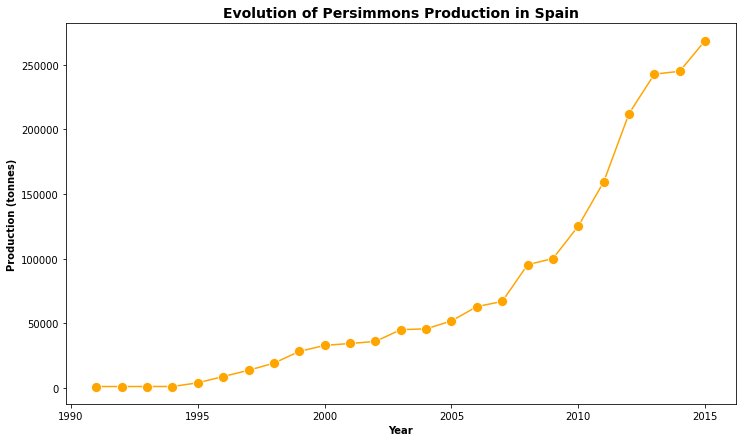

In [34]:
# Se crea un nuevo set de datos con la información necesaria
df_kaki=p_data[(p_data['Item']=='Persimmons')&(p_data['Area']=='Spain')]

# Eliminación de los datos del año 2016 y 2017 debido a que no se tienen registros

for year in [2016, 2017]:
    df_kaki=df_kaki[df_kaki['Year']!=year]

# Visualización
plt.figure(figsize=(12,7))
sns.lineplot(data=df_kaki, x='Year', y='Production', color='orange', marker='o', markersize=10)
plt.xlabel('Year', weight='bold')
plt.ylabel('Production (tonnes)', weight='bold')
plt.title('Evolution of Persimmons Production in Spain', weight='bold', fontsize=14)
plt.show()

**Como se puede ver, ha habido un incremento significativo de la producción de caqui en España desde el año 2005 hasta 2015**

### Crecimiento interanual de la producción de caqui en España

In [35]:
inc_production=[]
list_production=list(df_kaki['Production'])
for i, value in enumerate(list_production):
    if i ==0:
        n=0
    else:
        n=1
    increase=(value-list_production[i-n])/list_production[i-n]*100
    inc_production.append(round(increase,2))

df_kaki['[%]interannual_increment']=inc_production
df_kaki['[%]total_increment']=df_kaki['[%]interannual_increment'].cumsum()

In [36]:
df_kaki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 374137 to 374161
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      25 non-null     object 
 1   Item                      25 non-null     object 
 2   Year                      25 non-null     int64  
 3   Area harvested            25 non-null     float64
 4   Production                25 non-null     float64
 5   Yield                     25 non-null     float64
 6   Item_keywords             25 non-null     object 
 7   Crop_class                25 non-null     object 
 8   [%]interannual_increment  25 non-null     float64
 9   [%]total_increment        25 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.1+ KB


In [37]:
df_k=df_kaki[['Year', 'Production', '[%]interannual_increment','[%]total_increment']]

df_k.style.background_gradient(cmap='Reds', subset=(df_k.index, df_k.select_dtypes('float').columns))

,Year,Production,[%]interannual_increment,[%]total_increment
374137,1991,1222.000000,0.000000,0.000000
374138,1992,1222.000000,0.000000,0.000000
374139,1993,1222.000000,0.000000,0.000000
374140,1994,1222.000000,0.000000,0.000000
374141,1995,4084.000000,234.210000,234.210000
374142,1996,8929.000000,118.630000,352.840000
374143,1997,13775.000000,54.270000,407.110000
374144,1998,19279.000000,39.960000,447.070000
374145,1999,28371.000000,47.160000,494.230000
374146,2000,33000.000000,16.320000,510.550000


**En esta tabla se puede observar el incremento de producción interanual. Se
puede destacar incrementos muy significativos de la producción del año 1994 al
año 1995. Lo que está claro es que cada año se ha ido produciendo un incremento
de la producción con respecto al año interior, indicativo de que el cultivo del
caqui se ha ido extendiendo a lo largo de estos años, siendo este incremento acumulado de un 745,2%.**

# **Conclusiones**:
**Este es un pequeño ejemplo de la cantidad de información que se puede extraer de un dataset.** 

**Este trabajo solo constituye un pequeño esbozo de la cantidad de información que se puede obtener y que puede resultar, en determinados ámbitos, un fuente de útil para la toma de decisiones.**


